# Simulasi - 4 Naive Bayes Multinomial + Natural Language Processing (Hatespeech Twitter Prediction)

## Penjelasan

### Tujuan

Memprediksi kategori "Hatespeech" dari tweet user twitter apakah termasuk "Netral" / "Ras" / "Agama"

### Kolom

- User = User Twitter yang mengirim Tweet
- Tweet = Pesan yang disampaikan User
- Category = Kategori pesan/tweet

(Kami tambahkan manual dikarenakan di excel tidak ada nama kolom)

## A. Data Preparation

### A.1 Import Libraries

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stemmer = StemmerFactory().create_stemmer()
stopword = StopWordRemoverFactory().create_stop_word_remover()

import nltk
from nltk.corpus import stopwords

stop_word = set(stopwords.words('indonesian'))

### A.2 Load Data

In [83]:
try:
    df = pd.read_excel("TABEL DATA LATIH HATESPEECH RISET.xlsx", header=None)
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### 

### A.3 Membaca 5 Data Teratas

In [84]:
df.head()

,0,1,2
0,dxndelin,@amyliarm lingkunganmu keknya punya pemahaman ...,Netral
1,__succiduous,Udah jelek brengsek pula,Ras
2,KemenagMempawah,Lucunya penghuni negeri ini selalu di hiasi da...,Agama
3,1stKOREANguy1,"Yang jelek + miskin udah pasti bukan Kristen ,...",Ras
4,newsutdofficial,@MurtadhaOne1 Mereka memanfaatkan kebodohan ka...,Agama


### A.4 Menambahkan Nama Kolom

In [85]:
df.columns = ['User', 'Tweet', 'Category']

### A.5 Cek Duplikasi Data

In [86]:
df.duplicated().sum()

np.int64(45)

### A.5 Handling Duplikasi Data

In [87]:
df.drop_duplicates(inplace=True)

### A.6 Cek Nilai Yang Hilang

In [88]:
df.isna().sum()

User        1
Tweet       1
Category    2
dtype: int64

### A.7 Handling Nilai Yang Hilang

In [89]:
df.dropna(inplace=True)

## B. Text Preprocessing

### B.1 Text Preprocessing For EDA

#### Cleaning Text + Stemming Stopwords from Regex & Sastrawi (EDA)

In [141]:
def text_preprocess_sastrawi(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s', ' ', text).strip()
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'rt\s+', '', text)
    
    text = stopword.remove(text)
    text = stemmer.stem(text)
    
    return text

In [142]:
df['Tweet_Clean_EDA_sastrawi'] = df['Tweet'].apply(text_preprocess_sastrawi)

In [143]:
df['Tweet_Clean_EDA_sastrawi']

0       amyliarm lingkung kek punya paham kl anak punk...
1                                     udah jelek brengsek
2       lucu huni negeri selalu hias warna politik ide...
3       jelek miskin udah bukan kristen yang cantik pi...
4       murtadhaone manfaat bodoh kadrun lalu berita hoax
                              ...                        
1999                                      ikn potret maju
2000    kurang ajar memang orang cina hidup numpang pe...
2001    nah paham wahabi makin rebak sekitar paham aga...
2002    hidup negara pancasila mengplementasikan sila ...
2003    dasar yahudi musuh abadi umat islam dunia seri...
Name: Tweet_Clean_EDA_sastrawi, Length: 1957, dtype: object

In [93]:
# df['Tweet_Clean_EDA_sastrawi'].duplicated().sum()

In [94]:
# df['Tweet_Clean_EDA_sastrawi'] = df['Tweet_Clean_EDA_sastrawi'].drop_duplicates()

#### Cleaning Text + Stemming Stopwords from Regex & NLTK (EDA)

In [95]:
def text_preprocess_nltk(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s', ' ', text).strip()
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'rt\s+', '', text)

    
    text = stemmer.stem(text)
    words = text.split()
    words = [w for w in words if w not in stop_word]
    
    return " ".join(words)

In [96]:
df['Tweet_Clean_EDA_nltk'] = df['Tweet'].apply(text_preprocess_nltk)

In [97]:
df['Tweet_Clean_EDA_nltk']

0       amyliarm lingkung kek paham kl anak punk tuh j...
1                                     udah jelek brengsek
2       lucu huni negeri hias warna politik identitas ...
3       jelek miskin udah kristen cantik pinter jago n...
4            murtadhaone manfaat bodoh kadrun berita hoax
                              ...                        
1999                                      ikn potret maju
2000    ajar orang cina hidup numpang pelit ga kontrib...
2001    paham wahabi rebak paham agama tekstual pokok ...
2002    hidup negara pancasila mengplementasikan sila ...
2003    dasar yahudi musuh abadi umat islam dunia baut...
Name: Tweet_Clean_EDA_nltk, Length: 1957, dtype: object

In [98]:
# df['Tweet_Clean_EDA_nltk'].duplicated().sum()

In [99]:
# df['Tweet_Clean_EDA_nltk'] = df['Tweet_Clean_EDA_nltk'].drop_duplicates()

### B.2 Text Preprocessing For Modelling

#### Cleaning Text (Modelling)

In [100]:
def text_preprocess_model(text_series):
    text = text_series.str.lower().str.replace(r'[^a-z\s]', '', regex=True).str.strip()
    return text

In [101]:
df['Tweet_Clean_Modelling'] = text_preprocess_model(df['Tweet'])

In [102]:
df['Tweet_Clean_Modelling']

0       amyliarm lingkunganmu keknya punya pemahaman k...
1                                udah jelek brengsek pula
2       lucunya penghuni negeri ini selalu di hiasi da...
3       yang jelek  miskin udah pasti bukan kristen  t...
4       murtadhaone mereka memanfaatkan kebodohan kadr...
                              ...                        
1999                                  ikn potret kemajuan
2000    kurang ajar memang orang cina itu sudah hidup ...
2001    nah ini paham wahabi semakin merebak di sekita...
2002    kita hidup di negara pancasila harus mengpleme...
2003    dasar yahudi musuh abadi umat islam di dunia s...
Name: Tweet_Clean_Modelling, Length: 1957, dtype: object

In [103]:
# df['Tweet_Clean_Modelling'].duplicated().sum()

In [104]:
# df['Tweet_Clean_Modelling'] = df['Tweet_Clean_Modelling'].drop_duplicates()

## C. Exploratory Data Analysis (EDA)

### C.1 Univariate Analysis

Text(0, 0.5, '')

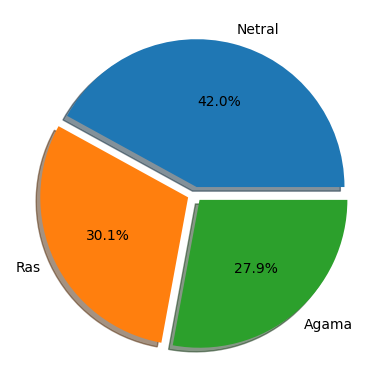

In [105]:
df['Category'].value_counts().plot(kind='pie',
                                   autopct="%1.1f%%",
                                   explode = (0.05, 0.05, 0.05),
                                   shadow = True)

plt.ylabel(None)

In [106]:
df['len_row'] = df['Tweet'].str.len()

In [107]:
df['len_row'].head()

0    146
1     24
2    158
3    146
4     71
Name: len_row, dtype: int64

### C.2 Bivariate Analysis

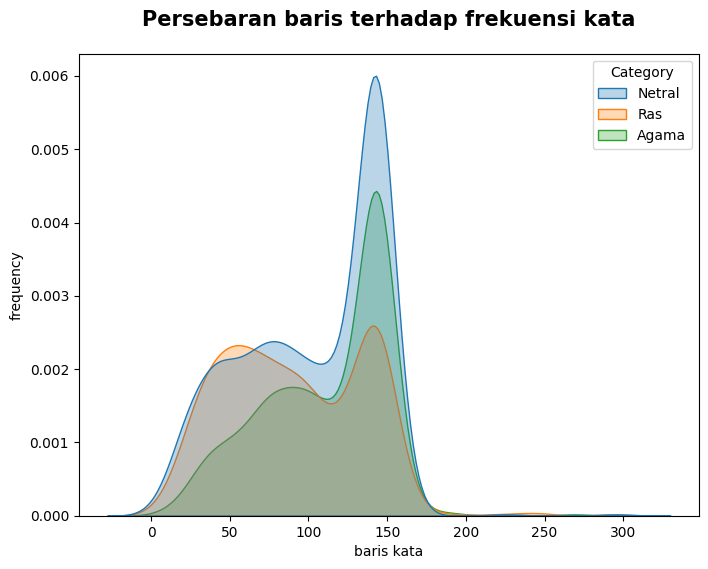

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df, x='len_row', hue='Category', fill=True, alpha = 0.3)
plt.title("Persebaran baris terhadap frekuensi kata", fontsize=15, fontweight ='bold', pad=20)
plt.xlabel("kata perbaris")
plt.ylabel("frequency")
plt.show()

### C.3 Top 10 Kata Setiap Kategori

In [109]:
category_mapping = {'Netral' : 0, 'Ras' : 1, 'Agama' : 2}
df['Category'] = df['Category'].map(category_mapping)

#### NLTK

In [110]:
top_netral_nltk = pd.Series(" ".join(df[df['Category'] == 0]['Tweet_Clean_EDA_nltk']).split()).value_counts().head(10)
top_ras_nltk = pd.Series(" ".join(df[df['Category'] == 1]['Tweet_Clean_EDA_nltk']).split()).value_counts().head(10)
top_agama_nltk = pd.Series(" ".join(df[df['Category'] == 2]['Tweet_Clean_EDA_nltk']).split()).value_counts().head(10)

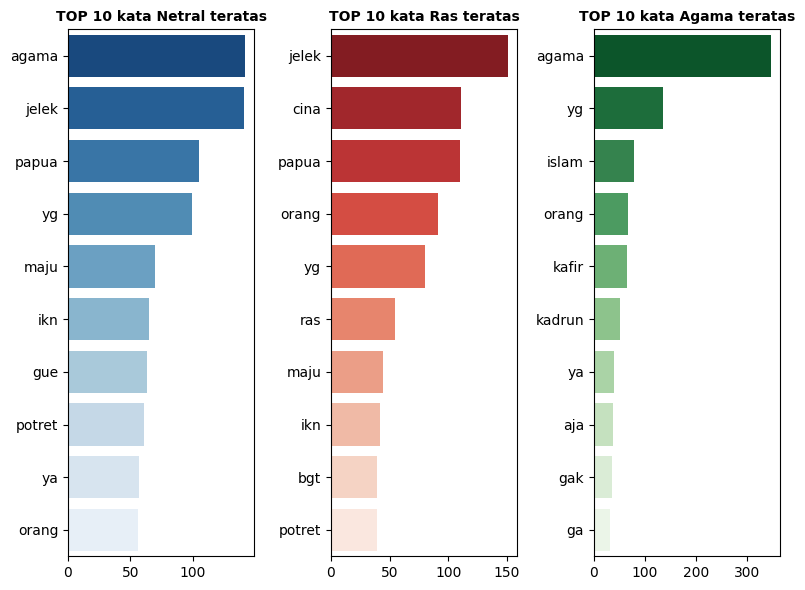

In [154]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=top_netral_nltk.values, y=top_netral_nltk.index, hue=top_netral_nltk.index, palette='Blues_r', legend=False)
plt.title("TOP 10 kata Netral teratas", fontsize=10, fontweight='bold')
plt.ylabel(None)

plt.subplot(1, 3, 2)
sns.barplot(x=top_ras_nltk.values, y=top_ras_nltk.index, hue=top_ras_nltk.index, palette='Reds_r', legend=False)
plt.title("TOP 10 kata Ras teratas", fontsize=10, fontweight = 'bold')
plt.ylabel(None)

plt.subplot(1, 3, 3)
sns.barplot(x=top_agama_nltk.values, y=top_agama_nltk.index, hue=top_agama_nltk.index, palette='Greens_r', legend=False)
plt.title("TOP 10 kata Agama teratas", fontsize = 10, fontweight = 'bold')
plt.ylabel(None)

plt.tight_layout()


#### Sastrawi

In [145]:
top_netral_sastrawi = pd.Series(" ".join(df[df['Category'] == 0]['Tweet_Clean_EDA_sastrawi']).split()).value_counts().head(10)
top_ras_sastrawi = pd.Series(" ".join(df[df['Category'] == 1]['Tweet_Clean_EDA_sastrawi']).split()).value_counts().head(10)
top_agama_sastrawi = pd.Series(" ".join(df[df['Category'] == 2]['Tweet_Clean_EDA_sastrawi']).split()).value_counts().head(10)

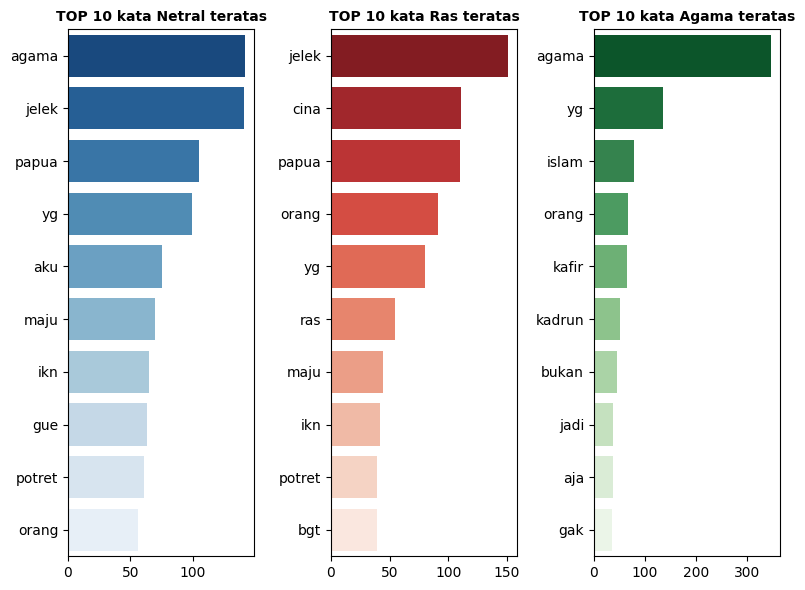

In [155]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=top_netral_sastrawi.values, y=top_netral_sastrawi.index, hue=top_netral_sastrawi.index, palette='Blues_r', legend=False)
plt.title("TOP 10 kata Netral teratas", fontsize=10, fontweight='bold')
plt.ylabel(None)

plt.subplot(1, 3, 2)
sns.barplot(x=top_ras_sastrawi.values, y=top_ras_sastrawi.index, hue=top_ras_sastrawi.index, palette='Reds_r', legend=False)
plt.title("TOP 10 kata Ras teratas", fontsize=10, fontweight = 'bold')
plt.ylabel(None)

plt.subplot(1, 3, 3)
sns.barplot(x=top_agama_sastrawi.values, y=top_agama_sastrawi.index, hue=top_agama_sastrawi.index, palette='Greens_r', legend=False)
plt.title("TOP 10 kata Agama teratas", fontsize = 10, fontweight = 'bold')
plt.ylabel(None)

plt.tight_layout()


## D. Modelling

### D.1 Defining X(Features) and y(Target) Variables

In [114]:
X_data = df['Tweet_Clean_Modelling']
y_data = df['Category']

### D.2 Splitting Train Data and Test Data (80:20)

In [115]:
def stratified_split(X_data, y_data, train_size = 0.8, random_state=42):
    np.random.seed(random_state)
    
    x_train_list, x_test_list = [], []
    y_train_list, y_test_list = [], []
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        x_train_list.append(X_data.iloc[idx[:split_ratio]])
        x_test_list.append(X_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    x_train_ = pd.concat(x_train_list).reset_index(drop=True)
    x_test_ = pd.concat(x_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return x_train_, x_test_, y_train, y_test
X_train , X_test, y_train, y_test = stratified_split(X_data, y_data)

### D.3 TF - IDF Formulas

#### Building Vocabulary

In [116]:
def build_vocabulary(text_series, min_counts=3):
    counts = pd.Series(" ".join(text_series).split()).value_counts()
    valid_words = sorted(counts[counts >= min_counts].index)
    
    return {w: i for i, w in enumerate(valid_words)}

#### Calculating TF (Term Frequency)

In [117]:
def calculate_tf(text_series, vocab_index):
    n_docs = len(text_series)
    n_vocab = len(vocab_index)
    tf_matrix = np.zeros((n_docs, n_vocab))
    
    for row, text in enumerate(text_series):
        words = text.split()
        for w in words:
            if w in vocab_index:
                col_idx = vocab_index[w]
                tf_matrix[row, col_idx] += 1
                
    return tf_matrix

#### Calculating IDF (Inverse Document Frequency)

In [118]:
def calculate_idf(text_series, vocab_index):
    n_docs = len(text_series)
    df_counts = dict.fromkeys(vocab_index.keys(), 0)
    
    for text in text_series:
        for word in set(text.split()):
            if word in df_counts:
                df_counts[word] += 1
        
    return {word: np.log(n_docs / (count + 1)) for word, count in df_counts.items()}

#### Calculating TF - IDF

In [119]:
def multiply_tf_idf(tf_matrix, vocab_index, idf_values):
    matrix = tf_matrix.copy()
    
    for w, idx_col in vocab_index.items():
        matrix[:, idx_col] *= idf_values[w]
    
    return matrix

#### Normalize Documents

In [120]:
def normalize_l2(matrix):
    norms = np.sqrt(np.sum(matrix ** 2, axis=1, keepdims=True))
    norms[norms == 0] = 1
    return matrix / norms

#### Run All TF-IDF Functions

In [121]:
vocab_index = build_vocabulary(X_train)

tf_train = calculate_tf(X_train, vocab_index)
tf_test = calculate_tf(X_test, vocab_index)

idf_values = calculate_idf(X_train, vocab_index)

X_train_matrix = multiply_tf_idf(tf_train, vocab_index, idf_values)
X_test_matrix = multiply_tf_idf(tf_test, vocab_index, idf_values)

X_train_matrix = normalize_l2(X_train_matrix)
X_test_matrix = normalize_l2(X_test_matrix)

print(f"Dimensi Train: {X_train_matrix.shape}")
print(f"Dimensi Test: {X_test_matrix.shape}")

Dimensi Train: (1564, 1306)
Dimensi Test: (393, 1306)


In [122]:
len(vocab_index)

1306

### D.4 Naive Bayes Multinomial

In [123]:
class NaiveBayesMultinomial:
    def __init__(self, alpha=1):
        self.alpha = alpha
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        self._priors = np.zeros(n_classes)
        self._feature_probs = np.zeros((n_classes, n_features))
        
        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._priors[idx] = X_c.shape[0] / n_samples
            
            numerator = X_c.sum(axis=0) + self.alpha
            denominator = X_c.sum() + (self.alpha * n_features)
            
            self._feature_probs[idx] = numerator / denominator
            
    def _predict(self, x):
        posteriors = []
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            likelihood = np.sum(x * np.log(self._feature_probs[idx]))
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self._classes[np.argmax(posteriors)]
    
    def predict(self, X):
        return np.array([self._predict(x) for x in X])

### D.5 Grid Search (Finding Best Alpha & Min Counts)

#### Grid Search Test Data

In [124]:
print("| Accuracy | Alpha | Min Counts |")

best_acc = 0
best_alpha = 0
best_mincounts = 0
list_alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5]
list_mincounts = [1, 2, 3, 4]

for mc in list_mincounts:
    vocab_cek = build_vocabulary(X_train, mc)
    
    tf_train_cek = calculate_tf(X_train, vocab_cek)
    tf_test_cek = calculate_tf(X_test, vocab_cek)
    idf_values_cek = calculate_idf(X_train, vocab_cek)
    
    X_train_matrix_cek = multiply_tf_idf(tf_train_cek, vocab_cek, idf_values_cek)
    X_test_matrix_cek = multiply_tf_idf(tf_test_cek, vocab_cek, idf_values_cek)
    
    X_train_matrix_cek = normalize_l2(X_train_matrix_cek)
    X_test_matrix_cek = normalize_l2(X_test_matrix_cek)
    
    for a in list_alpha:
        nbm = NaiveBayesMultinomial(a)
        nbm.fit(X_train_matrix_cek, y_train)
        pred = nbm.predict(X_test_matrix_cek)
        acc = np.mean(pred == y_test)
        print(f"|  {acc:.4f}  |  {a}  |  {mc}  |")
        
        if acc > best_acc:
            best_acc = acc
            best_alpha = a
            best_mincounts = mc
        
print(f"| Best Accuracy: {best_acc}  | Best Alpha: {best_alpha}  | Best Min Counts: {best_mincounts}")

| Accuracy | Alpha | Min Counts |
|  0.6132  |  0.1  |  1  |
|  0.6234  |  0.2  |  1  |
|  0.6310  |  0.3  |  1  |
|  0.6361  |  0.4  |  1  |
|  0.6438  |  0.5  |  1  |
|  0.6489  |  1  |  1  |
|  0.6132  |  2  |  1  |
|  0.5547  |  3  |  1  |
|  0.5293  |  4  |  1  |
|  0.5013  |  5  |  1  |
|  0.6056  |  0.1  |  2  |
|  0.6183  |  0.2  |  2  |
|  0.6234  |  0.3  |  2  |
|  0.6234  |  0.4  |  2  |
|  0.6260  |  0.5  |  2  |
|  0.6489  |  1  |  2  |
|  0.6514  |  2  |  2  |
|  0.6539  |  3  |  2  |
|  0.6005  |  4  |  2  |
|  0.5802  |  5  |  2  |
|  0.6387  |  0.1  |  3  |
|  0.6463  |  0.2  |  3  |
|  0.6361  |  0.3  |  3  |
|  0.6310  |  0.4  |  3  |
|  0.6361  |  0.5  |  3  |
|  0.6641  |  1  |  3  |
|  0.6514  |  2  |  3  |
|  0.6565  |  3  |  3  |
|  0.6463  |  4  |  3  |
|  0.6107  |  5  |  3  |
|  0.6234  |  0.1  |  4  |
|  0.6310  |  0.2  |  4  |
|  0.6387  |  0.3  |  4  |
|  0.6438  |  0.4  |  4  |
|  0.6539  |  0.5  |  4  |
|  0.6641  |  1  |  4  |
|  0.6641  |  2  |  4  |
|

#### Grid Search Train Data

In [125]:
print("| Accuracy | Alpha | Min Counts |")

best_acc = 0
best_alpha = 0
best_mincounts = 0
list_alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5]
list_mincounts = [1, 2, 3, 4]

for mc in list_mincounts:
    vocab_cek = build_vocabulary(X_train, mc)
    
    tf_train_cek = calculate_tf(X_train, vocab_cek)
    tf_test_cek = calculate_tf(X_test, vocab_cek)
    idf_values_cek = calculate_idf(X_train, vocab_cek)
    
    X_train_matrix_cek = multiply_tf_idf(tf_train_cek, vocab_cek, idf_values_cek)
    X_test_matrix_cek = multiply_tf_idf(tf_test_cek, vocab_cek, idf_values_cek)
    
    X_train_matrix_cek = normalize_l2(X_train_matrix_cek)
    X_test_matrix_cek = normalize_l2(X_test_matrix_cek)
    
    for a in list_alpha:
        nbm = NaiveBayesMultinomial(a)
        nbm.fit(X_train_matrix_cek, y_train)
        pred = nbm.predict(X_train_matrix_cek)
        acc = np.mean(pred == y_train)
        print(f"|  {acc:.4f}  |  {a}  |  {mc}  |")
        
        if acc > best_acc:
            best_acc = acc
            best_alpha = a
            best_mincounts = mc
        
print(f"| Best Accuracy: {best_acc}  | Best Alpha: {best_alpha}  | Best Min Counts: {best_mincounts}")

| Accuracy | Alpha | Min Counts |
|  0.9840  |  0.1  |  1  |
|  0.9808  |  0.2  |  1  |
|  0.9783  |  0.3  |  1  |
|  0.9770  |  0.4  |  1  |
|  0.9738  |  0.5  |  1  |
|  0.9476  |  1  |  1  |
|  0.8529  |  2  |  1  |
|  0.7500  |  3  |  1  |
|  0.6394  |  4  |  1  |
|  0.5671  |  5  |  1  |
|  0.9367  |  0.1  |  2  |
|  0.9303  |  0.2  |  2  |
|  0.9297  |  0.3  |  2  |
|  0.9271  |  0.4  |  2  |
|  0.9188  |  0.5  |  2  |
|  0.8900  |  1  |  2  |
|  0.8408  |  2  |  2  |
|  0.7839  |  3  |  2  |
|  0.7231  |  4  |  2  |
|  0.6733  |  5  |  2  |
|  0.8830  |  0.1  |  3  |
|  0.8811  |  0.2  |  3  |
|  0.8779  |  0.3  |  3  |
|  0.8772  |  0.4  |  3  |
|  0.8753  |  0.5  |  3  |
|  0.8632  |  1  |  3  |
|  0.8191  |  2  |  3  |
|  0.7807  |  3  |  3  |
|  0.7442  |  4  |  3  |
|  0.7014  |  5  |  3  |
|  0.8440  |  0.1  |  4  |
|  0.8434  |  0.2  |  4  |
|  0.8440  |  0.3  |  4  |
|  0.8440  |  0.4  |  4  |
|  0.8427  |  0.5  |  4  |
|  0.8344  |  1  |  4  |
|  0.8018  |  2  |  4  |
|

### D.6 Predict With Best Alpha & Min Counts

In [126]:
nbm = NaiveBayesMultinomial(1)
nbm.fit(X_train_matrix, y_train)

y_pred_test = nbm.predict(X_test_matrix)
y_pred_train = nbm.predict(X_train_matrix)

## E. Evaluasi

### E.1 Accuracy

#### Test Accuracy

In [127]:
test_accuracy = np.mean(y_pred_test == y_test)
print(f"{test_accuracy:.3f}")

0.664


#### Train Accuracy

In [128]:
train_accuracy = np.mean(y_pred_train == y_train)
print(f"{train_accuracy:.3f}")

0.863


### E.2 Confusion Matrix Multi-Class

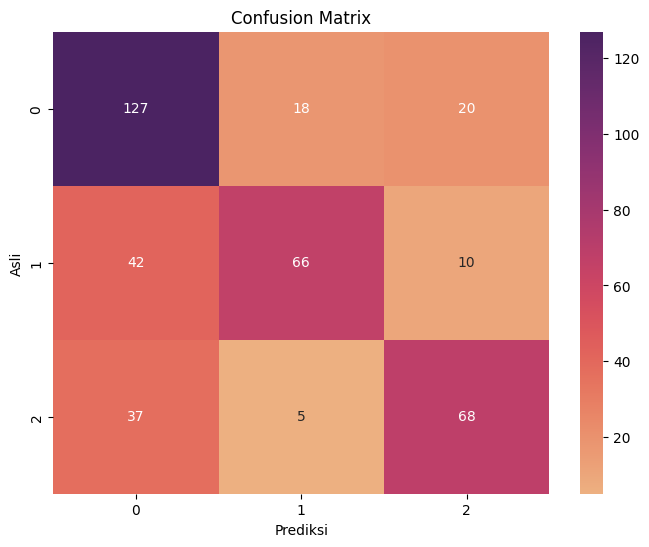

Kelas: Netral
True Positives: 127
False Positives: 79
False Negatives: 38
True Negatives: 149

Kelas: Ras
True Positives: 66
False Positives: 23
False Negatives: 52
True Negatives: 252

Kelas: Agama
True Positives: 68
False Positives: 30
False Negatives: 42
True Negatives: 253



In [129]:
confusion_matrix = pd.crosstab(y_test, y_pred_test, rownames=['Asli'], colnames=['Prediksi'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True, cmap='flare', fmt='d')
plt.title("Confusion Matrix")
plt.show()

cm_array = confusion_matrix.values
TP = np.diag(cm_array)
FP = np.sum(cm_array, axis=0) - TP
FN = np.sum(cm_array, axis=1) - TP
TN = np.sum(cm_array) - (TP + FP + FN)

class_names = confusion_matrix.columns
for i, name in enumerate(class_names):
    if name == 0:
        kelas = "Netral"
    elif name == 1:
        kelas = "Ras"
    else:
        kelas = "Agama"
        
    print(f"Kelas: {kelas}")
    print(f"True Positives: {TP[i]}")
    print(f"False Positives: {FP[i]}")
    print(f"False Negatives: {FN[i]}")
    print(f"True Negatives: {TN[i]}\n")

### E.3 Precision

In [130]:
precision = TP / (TP + FP)
precision = np.mean(precision)
print(f"{precision}")

0.683985146365735


### E.4 Recall

In [131]:
recall = TP / (TP + FN)
recall = np.mean(recall)
print(f"{recall}")

0.6490669405923642


### E.5 F-1 Score

In [132]:
f1 = 2 * (precision * recall) / (precision + recall)
print(f"{f1}")

0.6660687166024931


## F. GUI

### F.1 Rumus Utama GUI

In [156]:
# text_preprocess_model(pd.Series())

# calculate_tf()
# multiply_tf_idf()
# normalize_l2()

# nbm.predict()[0]

### F.2 Tkinter

In [173]:
import tkinter as tk
from tkinter import *

def predict():
    tweet = Input_Tweet.get("1.0", END).strip()
    tweet_clean = text_preprocess_model(pd.Series(tweet))
    tweet_tf = calculate_tf(tweet_clean, vocab_index)
    tweet_tf_idf = multiply_tf_idf(tweet_tf, vocab_index, idf_values)
    tweet_tf_idf = normalize_l2(tweet_tf_idf)
    pred = nbm.predict(tweet_tf_idf)[0]
    
    if pred == 1:
        teks_hasil = "Rasis"
    elif pred == 2:
        teks_hasil = "Agama"
    else:
        teks_hasil = "Netral"
    
    Hasil.config(text=f"{teks_hasil}")
    
# GUI UTAMA 
root = tk.Tk()
root.title("Naive Bayes Multinomial")
root.geometry("500x500")
root.config(bg="#00227e")

Header = Frame(root, bg="#00103b")
Header.pack(fill=X)
Judul = Label(Header, text="Hatespeech Category Prediction", bg="#00103b", fg="#b2c7ff", font=('Arial', 18, 'bold'))
Judul.pack(pady=(10, 5))
Deskripsi = Label(Header, text="NLP + Naive Bayes Multinomial", bg="#00103b", fg="#b2c7ff", font=('Arial', 10, 'bold'))
Deskripsi.pack(pady=(0, 20))

Main = Frame(root, bg="#00227e")
Main.pack(fill=X)
Keterangan = Label(Main, text="Masukkan Tweet", bg="#00227e", fg="#b2c7ff", font=('Arial', 10, 'bold'))
Keterangan.pack(pady=(20, 5))
Input_Tweet = Text(Main, bg='white', width=50, height=10)
Input_Tweet.pack(pady=10)
Button_Tweet = Button(Main, bg='#00103b', fg="#b2c7ff", text="Prediksi", width=10, font=('Arial', 12, 'bold'), command=predict)
Button_Tweet.pack(pady=20)
Hasil = Label(Main, text="-", font=('Arial', 16, 'bold'), bg='#00227e', fg='white')
Hasil.pack()
CopyKanan = Label(Main, text="(C) Copyright | Pemuda Sintaks - 2025", font=('Arial', 10, 'bold'), bg='#00227e', fg='white')
CopyKanan.pack(pady=(40, 0))

root.mainloop()

## Kesimpulan

### Insight Analysis

#### Overview Data

- Data memiliki 45 nilai duplikat
- Data Memiliki Missing Values yang tidak signifikan dan tidak berpengaruh pada model

#### Preprocess

- Akurasi tertinggi adalah yang tidak di stemming dan remove stopwords dan hanya cleaning text 

#### Eksplorasi Data

- Category di dominasi dengan label netral
- Kata netral mencakup beberapa kata yang ada di kategori ras dan agama, contohnya: agama dan papua
- Label Netral mendominasi frekuensi kata dengan kata perbaris di rentang 0 - 150
- Label kelas tidak imbalanced

### Insight Modelling

#### TF-IDF / TF

Train model menggunakan TF mendapatkan akurasi lebih tinggi Saat Grid-Search:
- TF-IDF = Test: 66.4% & Train: 86.3%
- TF = Test: 67.4% & Train: 81.8%

#### Feature Selection / Threshold saat pembobotan kata

Memanfaatkan parameter min_counts untuk memilih kata yang berguna sebelum Modelling (Feature Selection) dengan Threshold "3"

#### Jumlah Alpha Optimum

Memanfaatkan Grid-Search untuk menemukan alpha yang optimum (akurasi testing tertinggi)